# KNN exercise with NBA player data

## Introduction

- NBA player statistics from 2014-2015 (partial season): [data](https://github.com/JamesByers/GA-SEA-DAT1/blob/master/data/NBA_players_2015.csv), [data dictionary](https://github.com/JamesByers/GA-SEA-DAT1/blob/master/slides/07_nba_paper.pdf)
- **Problem to solve:** Predict player position using assists, steals, blocks, turnovers, and personal fouls

## Step 1: Read the data into Pandas

In [39]:
# read the data into a DataFrame named nba
import pandas as pd
path = '/Users/jim_byers/Documents/GA/GA_Data_Science_course/SEA-DAT1/data/'
url = path + 'NBA_players_2015.csv'
nba = pd.read_csv(url, index_col=0)

In [41]:
# examine the columns names to see what's there


In [42]:
# examine the number of players in each position to get a feel for the data


G    200
F    199
C     79
dtype: int64

## Step 2: Create X and y

Use the following features: assists, steals, blocks, turnovers, personal fouls

In [8]:
# map positions to numbers
# Specifically map the position names (C, F and G) to numbers starting with 0
#   and store them in a new column named 'pos_num'.
# We need to do this because KNN model algorithms require that the features
#   and responses be numeric.
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [ ]:
# create feature matrix (X) (it is a dataframe) that contains these columns from the nba dataframe:
# 'ast', 'stl', 'blk', 'tov', 'pf'


In [ ]:
# create response vector (y) that contains the position numbers (our labels)


## Step 3: Train a KNN model (K=5)

In [12]:
# import KNN class we need from scikit-learn


In [28]:
# instantiate the estimator with K=5


In [43]:
# run a knn.fit on the data to build the model


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=10, p=2, weights='uniform')

## Step 4: Use the model:
## Predict player position and calculate predicted probability of each position

Predict for a player with these statistics: 1 assist, 1 steal, 0 blocks, 1 turnover, 2 personal fouls

In [30]:
# create a list to represent a player
player = [1, 1, 0, 1, 2]

In [31]:
# make a prediction with the model


array([2])

In [32]:
# calculate the predicted probabilities


array([[ 0. ,  0.2,  0.8]])

## Step 5: Repeat steps 3 and 4 using K=50

In [34]:
# repeat for K=50


array([1])

In [25]:
# calculate predicted probabilities


array([[ 0.04,  0.56,  0.4 ]])

## Bonus: Explore the features to ones ones that likely are the most predictive

In [20]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [35]:
# get a describe of assists grouped by position.  Use .unstack() to format the output
nba.groupby('pos').ast.describe().unstack()
print("")
print("We do see that there are some differences in the mean values and quatriles.")
print("So we should be able to spot some predictive features.")


We do see that there are some differences in the mean values and quatriles.
So we should be able to spot some predictive features.



We see that while ast (assists) may not be a strong predictor of C vs F,
   it is a pretty good predictor of F vs G.


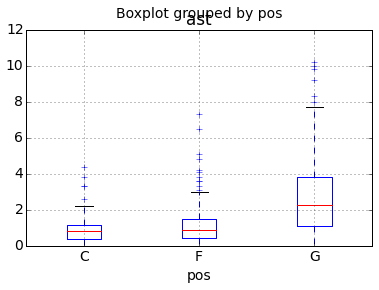

In [36]:
# box plot of assists grouped by position
nba.boxplot(column='ast', by='pos')
print("")
print("We see that while ast (assists) may not be a strong predictor of C vs F,")
print("   it is a pretty good predictor of F vs G.")


Another view to compare the distributions of values of assists by position.
It also indicates that this metric probably will only be mild predictor of C vs F,
   and appears that it is a pretty good predictor of F vs G.



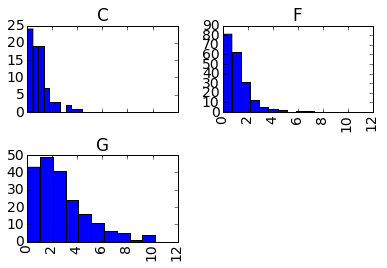

In [37]:
# group plot of histograms of assists grouped by position
nba.hist(column='ast', by='pos', sharex=True)
print("")
print("Another view to compare the distributions of values of assists by position.")
print("It also indicates that this metric probably will only be mild predictor of C vs F,")
print("   and appears that it is a pretty good predictor of F vs G.")
print("")